## mean year and variance of year all the 50 topics

In [114]:
import pandas as pd
import numpy as np
import tqdm

In [65]:
st = pd.read_csv('stm-doc_topic-test1.csv', sep=' ')
res = pd.DataFrame({'stm_mean': np.zeros(50), 
                    'stm_sd': np.zeros(50),
                    'ch_mean': np.zeros(50),
                    'ch_sd': np.zeros(50),}) 

In [66]:
for i in range(1,51):
    st['doc_topic.' + str(i)] = st['doc_topic.' + str(i)].apply(lambda x: x > 0.01)

In [67]:
for i in range(1,51):
    res.iloc[i-1]['stm_mean'] = st[st['doc_topic.' + str(i)]]['meta$date'].mean()
    res.iloc[i-1]['stm_sd'] = st[st['doc_topic.' + str(i)]]['meta$date'].std()

In [68]:
res.iloc[49]['stm_mean']

1974.58

In [111]:
with open('/Users/admin/Desktop/NLP-win-21/jason/method-comparison/ch-RMRB_p10_topics_output_articles.txt', 'r') as f:
    chtext = f.readlines()
ch_topic_year = {}

In [115]:
c = 0
for line in tqdm.tqdm(chtext):
    yr_num = int(line[:4])
    tpc_list = [int(i) for i in line[7:-3].split(', ')] 
    for tpc in tpc_list:
        if tpc in ch_topic_year.keys():
            ch_topic_year[tpc].append(yr_num)
        else:
            ch_topic_year[tpc] = []
            ch_topic_year[tpc].append(yr_num)

100%|██████████| 131951/131951 [00:00<00:00, 249942.24it/s]


In [120]:
for i in range(1,51):
    res.iloc[i-1]['ch_mean'] = np.mean(ch_topic_year[i-1])
    res.iloc[i-1]['ch_sd'] = np.std(ch_topic_year[i-1])

In [127]:
res

,stm_mean,stm_sd,ch_mean,ch_sd
0,1966.684211,11.156888,1977.701620,18.530606
1,1983.504298,12.480242,1968.023447,15.983128
2,1964.066265,8.887041,1973.390667,14.301116
3,1981.893750,13.012620,1979.934018,16.577174
4,1970.638298,15.438947,1974.918955,16.915496
5,1989.756532,11.307668,1977.221960,17.520710
6,1968.268293,10.671352,1975.867802,17.637467
7,1971.071685,6.318457,1977.901962,17.410520
8,1969.400510,6.810951,1971.220002,13.847246
9,1967.239845,18.550280,1971.466784,11.564397


1974.0178427072397


<AxesSubplot:>

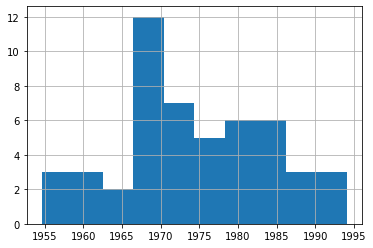

In [126]:
print(res.stm_mean.mean())
res.stm_mean.hist()

1975.2688295214116


<AxesSubplot:>

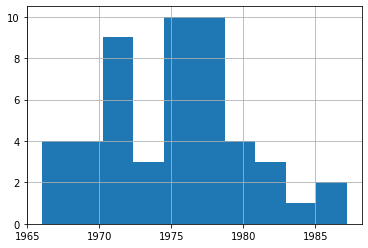

In [128]:
print(res.ch_mean.mean())
res.ch_mean.hist()

## Standard Deviation

STM 会抓住更微观的topic，同时也会抓住宏观的topic

12.853021788483318


<AxesSubplot:>

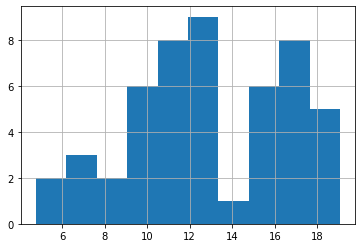

In [131]:
print(res.stm_sd.mean())
res.stm_sd.hist() 

16.376415682326595


<AxesSubplot:>

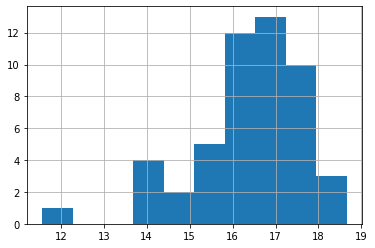

In [130]:
print(res.ch_sd.mean()) 
res.ch_sd.hist() 

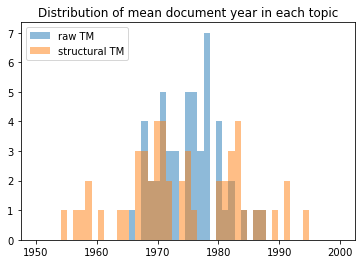

In [149]:
import matplotlib.pyplot as plt

x = res.ch_mean
y = res.stm_mean

bins = np.linspace(1950, 2000, 50)

plt.hist(x, bins, alpha=0.5, label='raw TM')
plt.hist(y, bins, alpha=0.5, label='structural TM')
plt.legend(loc='upper left')
plt.title('Distribution of mean document year in each topic')
plt.show()

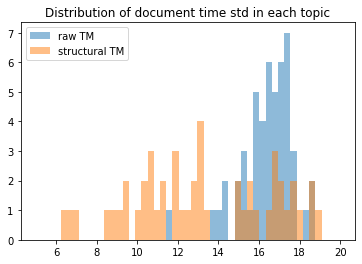

In [148]:
import matplotlib.pyplot as plt

x = res.ch_sd
y = res.stm_sd

bins = np.linspace(5, 20, 50)

plt.hist(x, bins, alpha=0.5, label='raw TM')
plt.hist(y, bins, alpha=0.5, label='structural TM')
plt.legend(loc='upper left')
plt.title('Distribution of document time std in each topic')
plt.show()

## word distribution: capture more general words